In [33]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore
from io import StringIO

In [34]:
def iterative_svd_impute(matrix, rank=20, max_iter=50, tol=1e-4):
    """Простая итеративная иммутация с использованием SVD"""
    X = np.copy(matrix)
    # Заполним пропуски средними по столбцам
    col_mean = np.nanmean(X, axis=0)
    inds = np.where(np.isnan(X))
    X[inds] = np.take(col_mean, inds[1])
    
    for it in range(max_iter):
        # SVD
        U, s, Vt = np.linalg.svd(X, full_matrices=False)
        s[rank:] = 0  # оставляем только rank компонент
        X_new = (U * s) @ Vt
        
        # возвращаем известные значения
        X_new[~np.isnan(matrix)] = matrix[~np.isnan(matrix)]
        
        # проверка сходимости
        diff = np.linalg.norm(X_new - X) / np.linalg.norm(X)
        print(f"Iteration {it+1}, relative change = {diff:.6f}")
        if diff < tol:
            break
        
        X = X_new
    return X_new


In [ ]:
# -----------------------------
# 1. Создаём исходную матрицу
# -----------------------------
np.random.seed(42)
M = np.random.rand(1000, 1000)

# -----------------------------
# 2. Удаляем половину данных (ставим NaN)
# -----------------------------
mask = np.random.rand(*M.shape) < 0.5
MM = M.copy()
MM[mask] = np.nan  # пропущенные значения

# -----------------------------
# 3. Восстанавливаем матрицу
# -----------------------------
X = iterative_svd_impute(MM, rank=20, max_iter=50)

# -----------------------------
# 4. Вычисляем RMSE
# -----------------------------



Iteration 1, relative change = 0.068536
Iteration 2, relative change = 0.034319
Iteration 3, relative change = 0.019195
Iteration 4, relative change = 0.011989
Iteration 5, relative change = 0.008308
Iteration 6, relative change = 0.006287
Iteration 7, relative change = 0.005086
Iteration 8, relative change = 0.004310
Iteration 9, relative change = 0.003769
Iteration 10, relative change = 0.003367
Iteration 11, relative change = 0.003053
Iteration 12, relative change = 0.002800
Iteration 13, relative change = 0.002589
Iteration 14, relative change = 0.002410
Iteration 15, relative change = 0.002255
Iteration 16, relative change = 0.002120
Iteration 17, relative change = 0.002000
Iteration 18, relative change = 0.001894
Iteration 19, relative change = 0.001798
Iteration 20, relative change = 0.001712
Iteration 21, relative change = 0.001633
Iteration 22, relative change = 0.001562
Iteration 23, relative change = 0.001496
Iteration 24, relative change = 0.001435
Iteration 25, relative ch

TypeError: 'module' object is not callable

In [39]:
error = np.linalg.norm(X - M)/np.linalg.norm(M)
print(f"\nОтносительная ошибка: {error}")


Относительная ошибка: 0.3818151082259542


In [40]:
def soft_threshold(singular_values, tau):
    """Применяет soft-thresholding к сингулярным значениям"""
    return np.maximum(singular_values - tau, 0)

def soft_impute(M_incomplete, lambda_reg=0.05, max_iter=50, tol=1e-4):
    """
    Алгоритм Soft-Impute
    M_incomplete — матрица с NaN на местах пропусков
    lambda_reg — параметр регуляризации (чем больше, тем сильнее усечение)
    """
    X = np.copy(M_incomplete)
    
    # Инициализация — заполняем пропуски средними по столбцам
    col_mean = np.nanmean(X, axis=0)
    inds = np.where(np.isnan(X))
    X[inds] = np.take(col_mean, inds[1])
    
    for it in range(max_iter):
        # SVD разложение текущей матрицы
        U, s, Vt = np.linalg.svd(X, full_matrices=False)
        
        # Мягкое усечение сингулярных чисел
        s_shrunk = soft_threshold(s, lambda_reg)
        
        # Восстановление приближённой матрицы
        X_new = (U * s_shrunk) @ Vt
        
        # Возвращаем известные элементы из исходной матрицы
        X_new[~np.isnan(M_incomplete)] = M_incomplete[~np.isnan(M_incomplete)]
        
        # Проверка сходимости
        diff = np.linalg.norm(X_new - X) / np.linalg.norm(X)
        print(f"Iteration {it+1}, relative change = {diff:.6f}")
        if diff < tol:
            break
        
        X = X_new
    
    return X_new


In [41]:
import numpy as np

# -----------------------------
# 1. Исходная матрица M
# -----------------------------
np.random.seed(42)
M = np.random.rand(1000, 1000)

# Пропускаем половину данных
mask = np.random.rand(*M.shape) < 0.5
MM = M.copy()
MM[mask] = np.nan

# -----------------------------
# 2. Применяем Soft-Impute
# -----------------------------
X_soft = soft_impute(MM, lambda_reg=0.05, max_iter=50)

# -----------------------------
# 3. Вычисляем RMSE
# -----------------------------
error = np.linalg.norm(X_soft - M)/np.linalg.norm(M)
print(f"Относительная ошибка после Soft-Impute: {error:.6f}")


Iteration 1, relative change = 0.001092
Iteration 2, relative change = 0.001083
Iteration 3, relative change = 0.001075
Iteration 4, relative change = 0.001067
Iteration 5, relative change = 0.001059
Iteration 6, relative change = 0.001050
Iteration 7, relative change = 0.001042
Iteration 8, relative change = 0.001035
Iteration 9, relative change = 0.001027
Iteration 10, relative change = 0.001019


KeyboardInterrupt: 

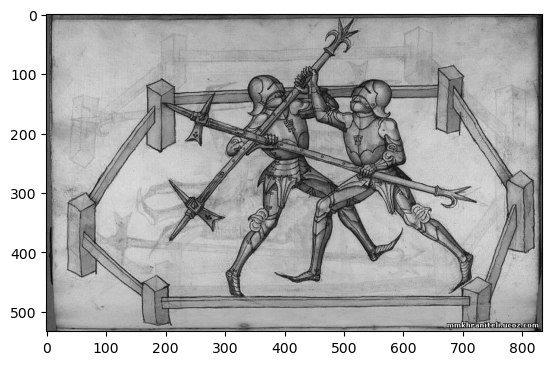

In [42]:
from skimage.io import imread

fecht = imread("fechtbuch.jpg")
fecht = fecht.mean(axis=2)

imgplot = plt.imshow(fecht, cmap='gray')

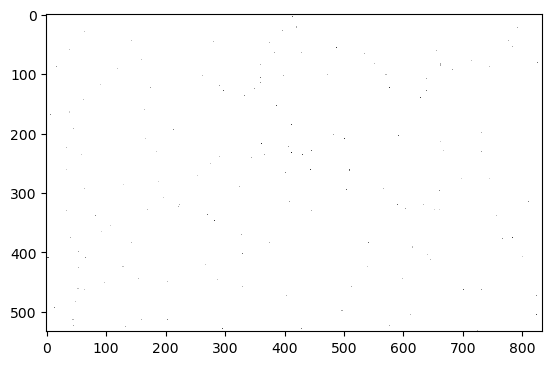

In [43]:
np.random.seed(42)
mask = np.random.rand(*fecht.shape) < 0.5
fecht_hidden = fecht.copy()
fecht_hidden[mask] = np.nan


imgplot = plt.imshow(fecht_hidden, cmap='gray')

Iteration 1, relative change = 0.076627
Iteration 2, relative change = 0.037498
Iteration 3, relative change = 0.020887
Iteration 4, relative change = 0.012703
Iteration 5, relative change = 0.008237
Iteration 6, relative change = 0.005624
Iteration 7, relative change = 0.004014
Iteration 8, relative change = 0.002981
Iteration 9, relative change = 0.002294
Iteration 10, relative change = 0.001825
Iteration 11, relative change = 0.001495
Iteration 12, relative change = 0.001257
Iteration 13, relative change = 0.001080
Iteration 14, relative change = 0.000946
Iteration 15, relative change = 0.000842
Iteration 16, relative change = 0.000758
Iteration 17, relative change = 0.000690
Iteration 18, relative change = 0.000633
Iteration 19, relative change = 0.000585
Iteration 20, relative change = 0.000543
Iteration 21, relative change = 0.000507
Iteration 22, relative change = 0.000474
Iteration 23, relative change = 0.000445
Iteration 24, relative change = 0.000419
Iteration 25, relative ch

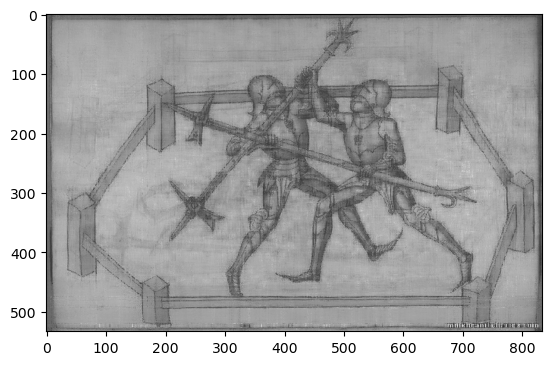

In [44]:
fecht_recovered = iterative_svd_impute(fecht_hidden, rank=20)
impglot = plt.imshow(fecht_recovered, cmap='gray')


error = np.linalg.norm(fecht_recovered - fecht)/np.linalg.norm(fecht)

print(f"Относительная ошибка после Iterative SVD: {error}")

Iteration 1, relative change = 0.000538
Iteration 2, relative change = 0.000537
Iteration 3, relative change = 0.000536
Iteration 4, relative change = 0.000534
Iteration 5, relative change = 0.000533
Iteration 6, relative change = 0.000532
Iteration 7, relative change = 0.000530
Iteration 8, relative change = 0.000529
Iteration 9, relative change = 0.000528
Iteration 10, relative change = 0.000526
Iteration 11, relative change = 0.000525
Iteration 12, relative change = 0.000523
Iteration 13, relative change = 0.000522
Iteration 14, relative change = 0.000521
Iteration 15, relative change = 0.000519
Iteration 16, relative change = 0.000518
Iteration 17, relative change = 0.000516
Iteration 18, relative change = 0.000515
Iteration 19, relative change = 0.000513
Iteration 20, relative change = 0.000512
Iteration 21, relative change = 0.000510
Iteration 22, relative change = 0.000509
Iteration 23, relative change = 0.000507
Iteration 24, relative change = 0.000506
Iteration 25, relative ch

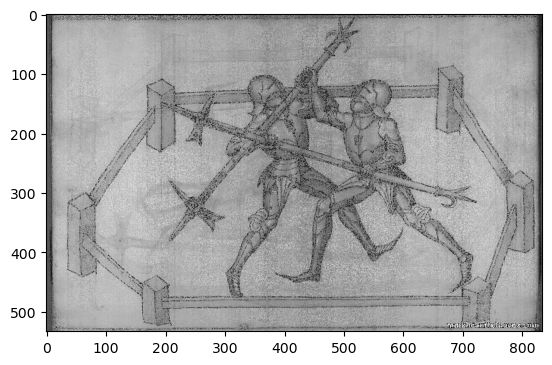

In [48]:
X = soft_impute(fecht_hidden, lambda_reg = 5)
imgplot = plt.imshow(X, cmap='gray')

error = np.linalg.norm(X - fecht)/np.linalg.norm(fecht)
print(f"Относительная ошибка после Soft-Impute: {error}")

In [ ]:
import asyncio
import aiohttp
import pandas as pd
import nest_asyncio

nest_asyncio.apply()

countries = ["USA", "CHN", "RUS", "IND", "BRA", "DEU", "ZAF", "JPN", "GBR", "CAN"]
indicator_code = "NY.GDP.PCAP.CD"  # GDP per capita (current US$)
start_year = 2015
end_year = 2024


async def fetch_gdp_country(session, country_iso3, indicator, start=start_year, end=end_year):
    """Получает данные ВВП за годы [start, end] для одной страны."""
    url = f"https://api.worldbank.org/v2/country/{country_iso3}/indicator/{indicator}"
    params = {"format": "json", "date": f"{start}:{end}", "per_page": 100}
    try:
        async with session.get(url, params=params, timeout=10) as resp:
            if resp.status != 200:
                print(f"Ошибка {resp.status} для {country_iso3}")
                return country_iso3, {}
            data = await resp.json()
    except Exception as e:
        print(f"Ошибка при получении {country_iso3}: {e}")
        return country_iso3, {}

    if not isinstance(data, list) or len(data) < 2:
        return country_iso3, {}

    result = {}
    for rec in data[1]:
        year = int(rec.get("date", 0))
        val = rec.get("value")
        if val is not None and start <= year <= end:
            result[year] = val
    return country_iso3, result


async def fetch_all_gdp():
    async with aiohttp.ClientSession() as session:
        tasks = [fetch_gdp_country(session, c, indicator_code) for c in countries]
        results = await asyncio.gather(*tasks)

    # Преобразуем результаты в DataFrame
    data = {country: vals for country, vals in results}
    df = pd.DataFrame(data).T  # строки — страны, столбцы — годы
    df = df.reindex(columns=sorted(df.columns))  # упорядочим годы
    return df


# --- Запуск ---
df_gdp = await fetch_all_gdp()
print(f"ВВП на душу населения (US$, {start_year}-{end_year}):")
df_gdp

ВВП на душу населения (US$, 2015-2024):


,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
USA,56849.469792,57976.628204,60047.719073,62875.666138,65227.956591,64401.507435,71307.401728,77860.911291,82304.620427,85809.900385
CHN,8175.332851,8254.868593,8979.676527,10085.663815,10342.900952,10627.463799,12887.435724,12970.605641,12951.178240,13303.148154
RUS,9277.713867,8663.158203,10658.913086,11211.887695,11447.701172,10108.327148,12425.029297,15619.614258,14159.387695,14889.018555
IND,1583.998159,1707.508929,1950.104683,1966.254552,2041.428637,1907.042516,2239.613844,2347.448294,2530.120313,2696.663900
BRA,8936.196617,8836.286527,10080.509282,9300.661649,9029.833267,7074.193783,7972.536650,9281.333344,10377.589279,10280.314862
DEU,41911.010985,42961.035691,45526.599958,48874.859503,47623.865607,47379.765195,52265.654162,49686.115458,53940.407345,55800.219455
ZAF,6112.273825,5651.205852,6618.335083,6914.178032,6533.711210,5580.603831,6843.399419,6523.410978,6022.542542,6253.371582
JPN,34960.639384,39375.473162,38834.052934,39751.133098,40415.956765,40028.734173,40094.559980,34065.643896,33836.175627,32475.892499
GBR,44983.885523,40988.104423,40629.234035,43315.487450,42794.002265,40404.806224,46926.475736,46062.991408,49200.810153,52636.786594
CAN,43594.194105,42314.061582,45129.628117,46539.176157,46352.869345,43537.839299,52886.661637,56256.800726,54220.328504,54282.617605


In [ ]:
mask = np.random.rand(*df_gdp.shape) < 0.1
df_gdp_hidden = df_gdp.copy()
df_gdp_hidden[mask] = np.nan

df_gdp_hidden

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
USA,56849.469792,57976.628204,60047.719073,NaN,65227.956591,64401.507435,NaN,77860.911291,82304.620427,85809.900385
CHN,8175.332851,8254.868593,8979.676527,10085.663815,10342.900952,10627.463799,12887.435724,12970.605641,12951.178240,13303.148154
RUS,9277.713867,8663.158203,10658.913086,NaN,11447.701172,NaN,12425.029297,15619.614258,NaN,NaN
IND,1583.998159,1707.508929,1950.104683,1966.254552,2041.428637,1907.042516,2239.613844,2347.448294,2530.120313,2696.663900
BRA,8936.196617,8836.286527,10080.509282,9300.661649,9029.833267,7074.193783,7972.536650,9281.333344,10377.589279,NaN
DEU,41911.010985,42961.035691,45526.599958,48874.859503,47623.865607,47379.765195,52265.654162,49686.115458,NaN,NaN
ZAF,6112.273825,5651.205852,6618.335083,6914.178032,6533.711210,5580.603831,6843.399419,NaN,6022.542542,6253.371582
JPN,34960.639384,39375.473162,38834.052934,39751.133098,40415.956765,40028.734173,40094.559980,34065.643896,33836.175627,32475.892499
GBR,44983.885523,40988.104423,40629.234035,43315.487450,42794.002265,40404.806224,46926.475736,46062.991408,49200.810153,52636.786594
CAN,43594.194105,42314.061582,45129.628117,46539.176157,46352.869345,43537.839299,52886.661637,56256.800726,54220.328504,54282.617605


In [ ]:
errors=[]
for r in range(1, 11):
    values = df_gdp_hidden.values.copy()
    df_gdp_recovered = iterative_svd_impute(values, rank=r)

    errors.append(np.linalg.norm(df_gdp_recovered - df_gdp.values)/np.linalg.norm(df_gdp.values))

Iteration 1, relative change = 0.163225
Iteration 2, relative change = 0.052553
Iteration 3, relative change = 0.021300
Iteration 4, relative change = 0.009608
Iteration 5, relative change = 0.004616
Iteration 6, relative change = 0.002305
Iteration 7, relative change = 0.001177
Iteration 8, relative change = 0.000609
Iteration 9, relative change = 0.000317
Iteration 10, relative change = 0.000166
Iteration 11, relative change = 0.000087
Iteration 1, relative change = 0.099300
Iteration 2, relative change = 0.035190
Iteration 3, relative change = 0.019104
Iteration 4, relative change = 0.012365
Iteration 5, relative change = 0.008396
Iteration 6, relative change = 0.005924
Iteration 7, relative change = 0.004498
Iteration 8, relative change = 0.003792
Iteration 9, relative change = 0.003526
Iteration 10, relative change = 0.003495
Iteration 11, relative change = 0.003581
Iteration 12, relative change = 0.003728
Iteration 13, relative change = 0.003914
Iteration 14, relative change = 0.

Error for rank 1: 0.021112824790627552
Error for rank 2: 0.017834713073550994
Error for rank 3: 0.15858593954660763
Error for rank 4: 0.2055818286655102
Error for rank 5: 0.2042956513867413
Error for rank 6: 0.22285736963834166
Error for rank 7: 0.2237470930752546
Error for rank 8: 0.22890474493265045
Error for rank 9: 0.22891121670282213
Error for rank 10: 0.2289112239234906


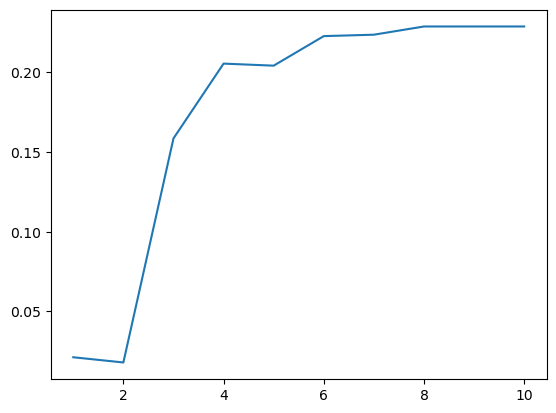

In [ ]:
plt.plot(list(range(1, 11)), errors)
for r in range(10):
    print(f"Error for rank {r + 1}: {errors[r]}")

In [ ]:

gdp_recovered = iterative_svd_impute(df_gdp_hidden.values, rank=2)

df_gdp_recovered = df_gdp_hidden.copy()

df_gdp_recovered.values[:] = gdp_recovered

df_gdp_recovered

Iteration 1, relative change = 0.099300
Iteration 2, relative change = 0.035190
Iteration 3, relative change = 0.019104
Iteration 4, relative change = 0.012365
Iteration 5, relative change = 0.008396
Iteration 6, relative change = 0.005924
Iteration 7, relative change = 0.004498
Iteration 8, relative change = 0.003792
Iteration 9, relative change = 0.003526
Iteration 10, relative change = 0.003495
Iteration 11, relative change = 0.003581
Iteration 12, relative change = 0.003728
Iteration 13, relative change = 0.003914
Iteration 14, relative change = 0.004131
Iteration 15, relative change = 0.004377
Iteration 16, relative change = 0.004655
Iteration 17, relative change = 0.004964
Iteration 18, relative change = 0.005308
Iteration 19, relative change = 0.005682
Iteration 20, relative change = 0.006080
Iteration 21, relative change = 0.006485
Iteration 22, relative change = 0.006864
Iteration 23, relative change = 0.007169
Iteration 24, relative change = 0.007335
Iteration 25, relative ch

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
USA,56849.469792,57976.628204,60047.719073,64859.277799,65227.956591,64401.507435,74203.802208,77860.911291,82304.620427,85809.900385
CHN,8175.332851,8254.868593,8979.676527,10085.663815,10342.900952,10627.463799,12887.435724,12970.605641,12951.178240,13303.148154
RUS,9277.713867,8663.158203,10658.913086,10799.569300,11447.701172,10426.785164,12425.029297,15619.614258,16213.272666,17291.773459
IND,1583.998159,1707.508929,1950.104683,1966.254552,2041.428637,1907.042516,2239.613844,2347.448294,2530.120313,2696.663900
BRA,8936.196617,8836.286527,10080.509282,9300.661649,9029.833267,7074.193783,7972.536650,9281.333344,10377.589279,9665.234165
DEU,41911.010985,42961.035691,45526.599958,48874.859503,47623.865607,47379.765195,52265.654162,49686.115458,51359.326620,52230.350447
ZAF,6112.273825,5651.205852,6618.335083,6914.178032,6533.711210,5580.603831,6843.399419,6147.553258,6022.542542,6253.371582
JPN,34960.639384,39375.473162,38834.052934,39751.133098,40415.956765,40028.734173,40094.559980,34065.643896,33836.175627,32475.892499
GBR,44983.885523,40988.104423,40629.234035,43315.487450,42794.002265,40404.806224,46926.475736,46062.991408,49200.810153,52636.786594
CAN,43594.194105,42314.061582,45129.628117,46539.176157,46352.869345,43537.839299,52886.661637,56256.800726,54220.328504,54282.617605


In [ ]:
df_gdp

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
USA,56849.469792,57976.628204,60047.719073,62875.666138,65227.956591,64401.507435,71307.401728,77860.911291,82304.620427,85809.900385
CHN,8175.332851,8254.868593,8979.676527,10085.663815,10342.900952,10627.463799,12887.435724,12970.605641,12951.178240,13303.148154
RUS,9277.713867,8663.158203,10658.913086,11211.887695,11447.701172,10108.327148,12425.029297,15619.614258,14159.387695,14889.018555
IND,1583.998159,1707.508929,1950.104683,1966.254552,2041.428637,1907.042516,2239.613844,2347.448294,2530.120313,2696.663900
BRA,8936.196617,8836.286527,10080.509282,9300.661649,9029.833267,7074.193783,7972.536650,9281.333344,10377.589279,10280.314862
DEU,41911.010985,42961.035691,45526.599958,48874.859503,47623.865607,47379.765195,52265.654162,49686.115458,53940.407345,55800.219455
ZAF,6112.273825,5651.205852,6618.335083,6914.178032,6533.711210,5580.603831,6843.399419,6523.410978,6022.542542,6253.371582
JPN,34960.639384,39375.473162,38834.052934,39751.133098,40415.956765,40028.734173,40094.559980,34065.643896,33836.175627,32475.892499
GBR,44983.885523,40988.104423,40629.234035,43315.487450,42794.002265,40404.806224,46926.475736,46062.991408,49200.810153,52636.786594
CAN,43594.194105,42314.061582,45129.628117,46539.176157,46352.869345,43537.839299,52886.661637,56256.800726,54220.328504,54282.617605


In [ ]:
df_gdp_hidden

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
USA,56849.469792,57976.628204,60047.719073,NaN,65227.956591,64401.507435,NaN,77860.911291,82304.620427,85809.900385
CHN,8175.332851,8254.868593,8979.676527,10085.663815,10342.900952,10627.463799,12887.435724,12970.605641,12951.178240,13303.148154
RUS,9277.713867,8663.158203,10658.913086,NaN,11447.701172,NaN,12425.029297,15619.614258,NaN,NaN
IND,1583.998159,1707.508929,1950.104683,1966.254552,2041.428637,1907.042516,2239.613844,2347.448294,2530.120313,2696.663900
BRA,8936.196617,8836.286527,10080.509282,9300.661649,9029.833267,7074.193783,7972.536650,9281.333344,10377.589279,NaN
DEU,41911.010985,42961.035691,45526.599958,48874.859503,47623.865607,47379.765195,52265.654162,49686.115458,NaN,NaN
ZAF,6112.273825,5651.205852,6618.335083,6914.178032,6533.711210,5580.603831,6843.399419,NaN,6022.542542,6253.371582
JPN,34960.639384,39375.473162,38834.052934,39751.133098,40415.956765,40028.734173,40094.559980,34065.643896,33836.175627,32475.892499
GBR,44983.885523,40988.104423,40629.234035,43315.487450,42794.002265,40404.806224,46926.475736,46062.991408,49200.810153,52636.786594
CAN,43594.194105,42314.061582,45129.628117,46539.176157,46352.869345,43537.839299,52886.661637,56256.800726,54220.328504,54282.617605


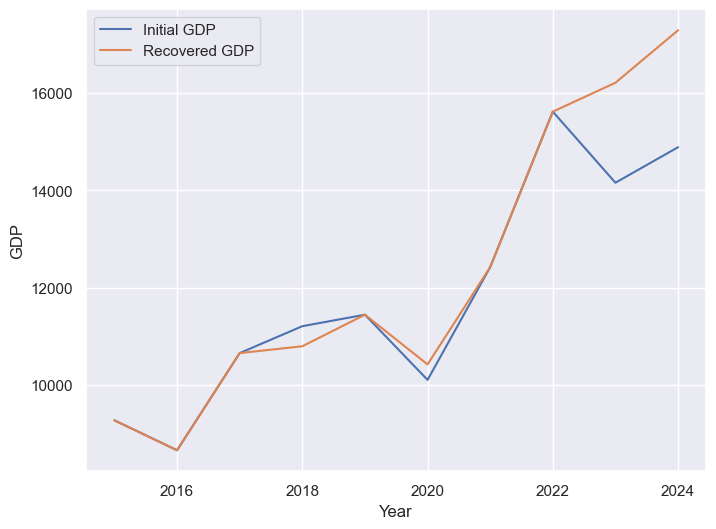

In [ ]:
import seaborn as sns

melted_row_init = df_gdp.loc["RUS"].reset_index().rename(columns={'index': 'Year', "RUS": 'GDP'})

melted_row_recovered = df_gdp_recovered.loc["RUS"].reset_index().rename(columns={'index': 'Year', "RUS": 'GDP'})



sns.set_theme()
sns.set(rc={"figure.figsize": (8, 6)}) # width=8 inches, height=4 inches

sns.lineplot(data=melted_row_init, x="Year", y="GDP", label="Initial GDP")
sns.lineplot(data=melted_row_recovered, x='Year', y="GDP", label="Recovered GDP")
plt.legend()